<a href="https://colab.research.google.com/github/alfonsocude/MACHINE-LEARNING-1/blob/main/12%20-%20%5BTALLER%5D%20-%20Analisis%20exploratorio%20de%20un%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/alfonsocude/MACHINE-LEARNING-1/main/init.py
import init; init.init(force_download=False);  

'wget' is not recognized as an internal or external command,
operable program or batch file.


# Precios de Casas

El objetivo de este taller es realizar un análisis exploratorio de un dataset. El dataset no llega limpio, el proceso de limpieza se encuentra implementado. Después de este proceso de limpieza se debe llevar a cabo el análisis exploratorio.

In [2]:
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Entendiendo y limpiando el dataset

La descripcion de cada variable puede verse ejecutando la siguiente celda

In [3]:
!type local\data\houseprices_description.txt


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Ahora carguemos los datos y hagamos una breve exploración

In [61]:
df = pd.read_csv("local/data/houseprices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Podemos ver que hay una gran cantidad de valores nulos en algunas de las variables. Alguien, algo despistado, podría sugerir simplemente eliminar esas variables; sin embargo, la descripción de las variables que observamos anteriormente, nos permite entender la razón de ser de estos valores nulos y tratarlos de una manera inteligente. Por ejemplo, consideremos la variable `PoolQC` la cual nos muestra únicamente 7 valores no nulos de los 1460 registros que tenemos en total. Su descripción dice:

```
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

```

Esta variable hace referencia a la calidad de la piscina en la casa y vemos que `NA` significa que no tiene piscina, lo cual posiblemente tiene mucho impacto en el precio de una casa (pregúntese, ¿estaría dispuesto a pagar más por una casa que tenga piscina?). Además, vemos que existe la variable `PoolArea`, la cual almacena el area de la piscina en $ft^2$, la cual no tiene valores nulos. Dado esto, los valores nulos de la variable `PoolQC` deben corresponder a casos en los que la variable `PoolArea` es cero; validemos esto.


In [6]:
num_total_nulls = df["PoolQC"].isna().sum()
num_nulls_when_poolarea_is_zero = df[df["PoolArea"] == 0]["PoolQC"].isna().sum()
assert num_nulls_when_poolarea_is_zero == num_total_nulls

In [7]:
num_nulls_when_poolarea_is_not_zero = df[df["PoolArea"] != 0]["PoolQC"].isna().sum()
assert num_nulls_when_poolarea_is_not_zero == 0

Concluimos que se cumple que todos los valores nulos de la variable `PoolQC` corresponden a casos en los que no hay piscina; por lo tanto, vamos a reemplzar los valores nulos por otro valor que podamos usar en nuestros modelos.

In [8]:
df["PoolQC"] = df["PoolQC"].fillna("NP")

Esta misma lógica debemos usarla a la hora de tratar el resto de las variables con valores nulos de este dataset. Escribiremos algún razonamiento addiconal únicamente cuando haga falta

In [9]:
num_total_nulls = df["MiscFeature"].isna().sum()
num_nulls_when_miscval_is_zero = df[df["MiscVal"] == 0]["MiscFeature"].isna().sum()
num_nulls_when_miscval_is_not_zero = df[df["MiscVal"] != 0]["MiscFeature"].isna().sum()
assert num_nulls_when_miscval_is_zero == num_total_nulls
assert num_nulls_when_miscval_is_not_zero == 0
df["MiscFeature"] = df["MiscFeature"].fillna("No MF")

In [10]:
num_total_nulls = df["FireplaceQu"].isna().sum()
num_nulls_when_fireplaces_is_zero = df[df["Fireplaces"] == 0]["FireplaceQu"].isna().sum()
num_nulls_when_fireplaces_is_not_zero = df[df["Fireplaces"] != 0]["FireplaceQu"].isna().sum()
assert num_nulls_when_fireplaces_is_zero == num_total_nulls
assert num_nulls_when_fireplaces_is_not_zero == 0
df["FireplaceQu"] = df["FireplaceQu"].fillna("No FP")

In [11]:
num_area_zeros = (df["GarageArea"] == 0).sum()
num_cars_zeros = (df["GarageCars"] == 0).sum()
num_both_zeros = ((df["GarageArea"] == 0) & (df["GarageCars"] == 0.0)).sum()
assert num_both_zeros == num_area_zeros == num_cars_zeros
for colname in ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]:
    num_total_nulls = df[colname].isna().sum()
    num_nulls_when_area_and_cars_capacity_is_zero = df[(df["GarageArea"] == 0.0) & (df["GarageCars"] == 0.0)][colname].isna().sum()
    num_nulls_when_area_and_cars_capacity_is_not_zero = df[(df["GarageArea"] != 0.0) & (df["GarageCars"] != 0.0)][colname].isna().sum()
    assert num_total_nulls == num_nulls_when_area_and_cars_capacity_is_zero
    assert num_nulls_when_area_and_cars_capacity_is_not_zero == 0
    df[colname] = df[colname].fillna("No Ga")

Para la variable `GarageYrBlt` debemos ser más cuidadosos, ya que son números y no strings. Esta variable nos dice el año en que fue construido el garaje y, según lo visto con otras variables relacionadas al garage, los valores nulos corresponden a casos en los que no hay garage. En este caso, vamos a imputar esa variable con un año posterior a la fecha de venta. Esta aproximación podría no funcionar muy bien con modelos lineales, o cuando escalamos los datos, pero no se me ocurre otra!

In [12]:
num_total_nulls = df["GarageYrBlt"].isna().sum()
num_nulls_when_area_and_cars_is_zero = df[(df["GarageArea"] == 0.0) & (df["GarageCars"] == 0.0)]["GarageYrBlt"].isna().sum()
num_nulls_when_area_and_cars_is_not_zero = df[(df["GarageArea"] != 0.0) & (df["GarageCars"] != 0.0)]["GarageYrBlt"].isna().sum()
assert num_nulls_when_area_and_cars_is_zero == num_total_nulls
assert num_nulls_when_area_and_cars_is_not_zero == 0

df["GarageYrBlt"].where(~df["GarageYrBlt"].isna(), other=df["YrSold"] + 1, inplace=True)
#df["GarageYrBlt"] = df["GarageYrBlt"].where(~df["GarageYrBlt"].isna(), other=df["YrSold"] + 1)


C:\Users\nesto\AppData\Local\Temp\ipykernel_19860\3779153496.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GarageYrBlt"].where(~df["GarageYrBlt"].isna(), other=df["YrSold"] + 1, inplace=True)


`LotFrontage: Linear feet of street connected to property)`

Valores nulos en esta variable podrían ser ocasionados porque sencillamente no hay conexión de la calle a la propiedad, es decir, que esa longitud medida por esta variable es igual a 0. Podemos asumir que este es el caso únicamente si no hay otro 0 en los valores que ha tomado esta variable, de otra manera ¿por qué algunos tendrían 0 y otros nulos?

In [13]:
assert (df["LotFrontage"] == 0).sum() == 0
df["LotFrontage"].fillna(0, inplace=True)
#df["LotFrontage"] = df["LotFrontage"].fillna(0)


C:\Users\nesto\AppData\Local\Temp\ipykernel_19860\1270084340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LotFrontage"].fillna(0, inplace=True)


In [14]:
df["Alley"].fillna("NA", inplace=True)
df["Fence"].fillna("NF", inplace=True)

#df["Alley"].fillna("NA")
#df["Fence"].fillna("NF")

C:\Users\nesto\AppData\Local\Temp\ipykernel_19860\2842856852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Alley"].fillna("NA", inplace=True)
C:\Users\nesto\AppData\Local\Temp\ipykernel_19860\2842856852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

```
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet
```

Una posibilidad es que los valores nulos de `MasVnrType` y `MasVnrArea` correspondan a casos en los que no hay "Masonry veneer" (chapa de albañilería). Esto sería en los casos en que la variable `MasVnrArea` sea 0, esto lo validaremos de la misma manera en que validamos con la variable `LotFrontage`.

In [15]:
#assert (df["MasVnrArea"] == 0).sum() == df["MasVnrType"].isnull().sum()

Acá la situación es diferente, el error anterior nos dice que los casos para los cuales no tenemos área son distintos de los que el tipo es nulo, entonces nos toca inspeccionar más en detalle. Sabemos que hay 8 valores nulos en cada una de las dos variables, miremos si corresponden a los mismos registros:

In [16]:
np.logical_and(df["MasVnrType"].isnull().values, df["MasVnrArea"].isnull().values).sum()

np.int64(8)

En efecto, dado que hay 8 registros para los cuales las dos variables tienen valores nulos, podemos decir que son nulos en ambas partes. A falta de información, vamos a decidir eliminar esos registros por completo, no debe ser muy grave, pues apenas son 8 filas en todo el dataset.

In [17]:
df = df.dropna(subset=["MasVnrType", "MasVnrArea"])

Ahora miremos los valores de cada una

In [18]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [19]:
df["MasVnrArea"].value_counts()

MasVnrArea
108.0    8
72.0     8
180.0    8
120.0    7
16.0     7
        ..
426.0    1
96.0     1
438.0    1
194.0    1
119.0    1
Name: count, Length: 326, dtype: int64

Acá podemos observar lo siguiente:
- Hay 864 registros con `MasVnrType="None"`
- Hay 861 registros con `MasVnrArea=0`

Eso quiere decir que hay algunos registros que deberían tener un área de 0 y no es así. Vamos a mirar en detalle cuáles son:

In [20]:
df[(df["MasVnrType"] == "None") & (df["MasVnrArea"] != 0.0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Francamente** yo no soy un experto en casas, por lo que no tengo forma de deducir a qué se debe esa incoherencia en los datos. Por lo anterior, simplemente voy a eliminar esas filas, ya que tengo dudas de la veracidad de esos datos.

In [21]:
df = df[~((df["MasVnrType"] == "None") & (df["MasVnrArea"] != 0.0))]

La variable `Electrical` tampoco nos ofrece una forma de recuperar esos valores nulos, por lo que también vamos a eliminar ese registro. Nótese que otra opción podría ser reemplazarlo con el valor más común en la misma variable, dado que esta es categórica. 

In [22]:
df.dropna(subset=["Electrical"], inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 0 to 1456
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             588 non-null    int64  
 1   MSSubClass     588 non-null    int64  
 2   MSZoning       588 non-null    object 
 3   LotFrontage    588 non-null    float64
 4   LotArea        588 non-null    int64  
 5   Street         588 non-null    object 
 6   Alley          588 non-null    object 
 7   LotShape       588 non-null    object 
 8   LandContour    588 non-null    object 
 9   Utilities      588 non-null    object 
 10  LotConfig      588 non-null    object 
 11  LandSlope      588 non-null    object 
 12  Neighborhood   588 non-null    object 
 13  Condition1     588 non-null    object 
 14  Condition2     588 non-null    object 
 15  BldgType       588 non-null    object 
 16  HouseStyle     588 non-null    object 
 17  OverallQual    588 non-null    int64  
 18  OverallCond   

Ahora miremos las variables relacionadas con el basement:

```

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

```


Dado que los valores nulos en varias de estas variables corresponden a `No Basement`, ahora miremos si los registros nulos en algunas corresponden a los registros nulos en todas. Primero, dado que ya hemos eliminado varios registros, vamos a ver cuántos valores nulos hay en esas variables.

In [24]:
colnames = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
for c in colnames:
    print(f"{c} tiene {df[c].isnull().sum()} valores nulos")

BsmtQual tiene 5 valores nulos
BsmtCond tiene 5 valores nulos
BsmtExposure tiene 6 valores nulos
BsmtFinType1 tiene 5 valores nulos
BsmtFinSF1 tiene 0 valores nulos
BsmtFinType2 tiene 6 valores nulos
BsmtFinSF2 tiene 0 valores nulos
BsmtUnfSF tiene 0 valores nulos
TotalBsmtSF tiene 0 valores nulos


In [25]:
df["TotalBsmtSF"].value_counts()

TotalBsmtSF
848     11
864      8
483      7
1392     5
832      5
        ..
1752     1
1425     1
1410     1
1571     1
1746     1
Name: count, Length: 421, dtype: int64

Acá vemos que algunas tienen más variables nulas que otras, lo cual es confuso porque en cualquier caso los valores nulos deberían significar que no hay basement. En este caso vamos a reemplazar los valores en los que los valores nulos sean en todas las variables no numéricas pero los que sobren los eliminaremos.

In [26]:
colnames = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
cond = ~(df["BsmtQual"].isna() & df["BsmtCond"].isna() & df["BsmtExposure"].isna() & df["BsmtFinType1"].isna() & df["BsmtFinType2"].isna())
for c in colnames:
    df[c].where(cond, other="NB", inplace=True)

C:\Users\nesto\AppData\Local\Temp\ipykernel_19860\3356074739.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].where(cond, other="NB", inplace=True)
C:\Users\nesto\AppData\Local\Temp\ipykernel_19860\3356074739.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [28]:
df.dropna(inplace=True)
print(f"El número de valores {df.isna().sum().sum()} en un dataframe de un tamaño de {df.shape}")

El número de valores 0 en un dataframe de un tamaño de (586, 81)


## Análisis exploratorio de datos

En esta sección se dejarán preguntas que deben ser respondidas utilizando los datos.

### **¿Qué tan viejas son las casas?**

<Axes: >

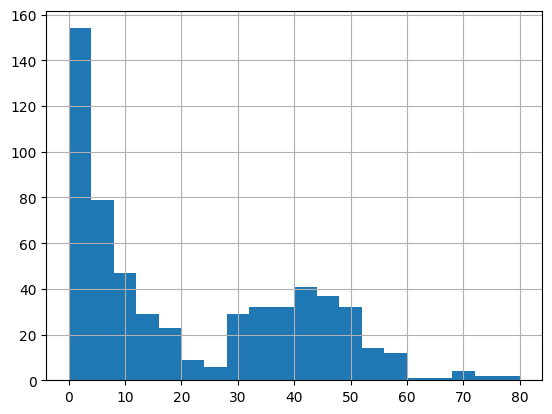

In [42]:
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
df["HouseAge"].hist(bins=20)

#### Conclusiones

* La mayoría de las casas son relativamente nuevas, con una gran concentración entre 0 y 10 años de antigüedad. Hay un pico muy marcado en ese rango, con más de 150 casas.

* A medida que aumenta la edad, la cantidad de casas disminuye notablemente.

* se observan algunos picos menores entre los 30 y 50 años, lo que indica que también hay algunas casas más antiguas en el conjunto de datos.

* Muy pocas casas tienen más de 60 años.

### **¿Cómo se relaciona el precio con la edad de la casa?**

In [47]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

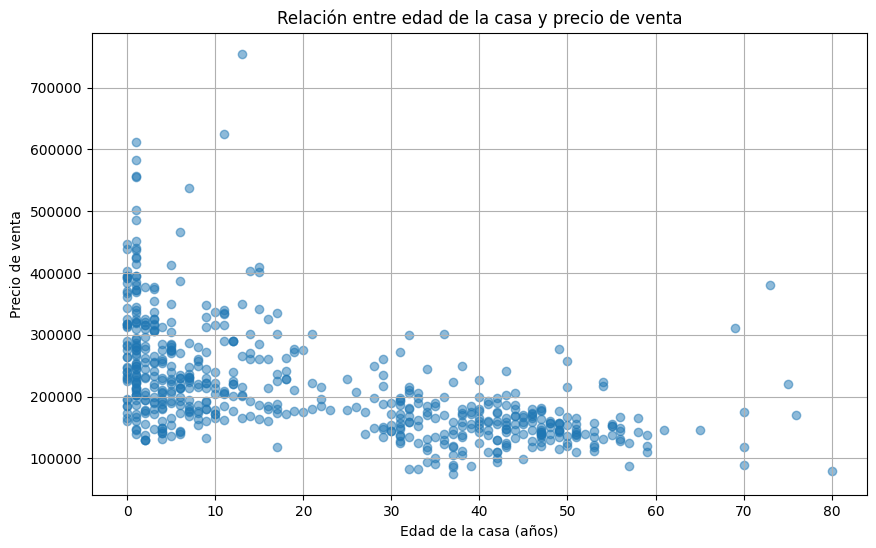

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(df["HouseAge"], df["SalePrice"], alpha=0.5)
plt.title("Relación entre edad de la casa y precio de venta")
plt.xlabel("Edad de la casa (años)")
plt.ylabel("Precio de venta")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Tendencia entre edad de la casa y precio de venta')

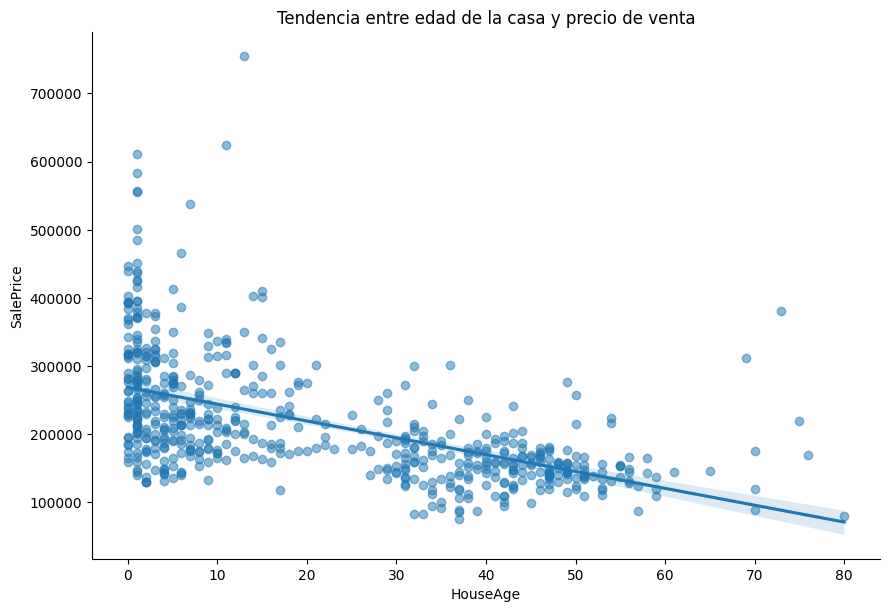

In [49]:
sns.lmplot(x="HouseAge", y="SalePrice", data=df, height=6, aspect=1.5, scatter_kws={"alpha":0.5})
plt.title("Tendencia entre edad de la casa y precio de venta")


C:\Users\nesto\AppData\Local\Temp\ipykernel_19860\2735429273.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("AgeGroup")["SalePrice"].mean()


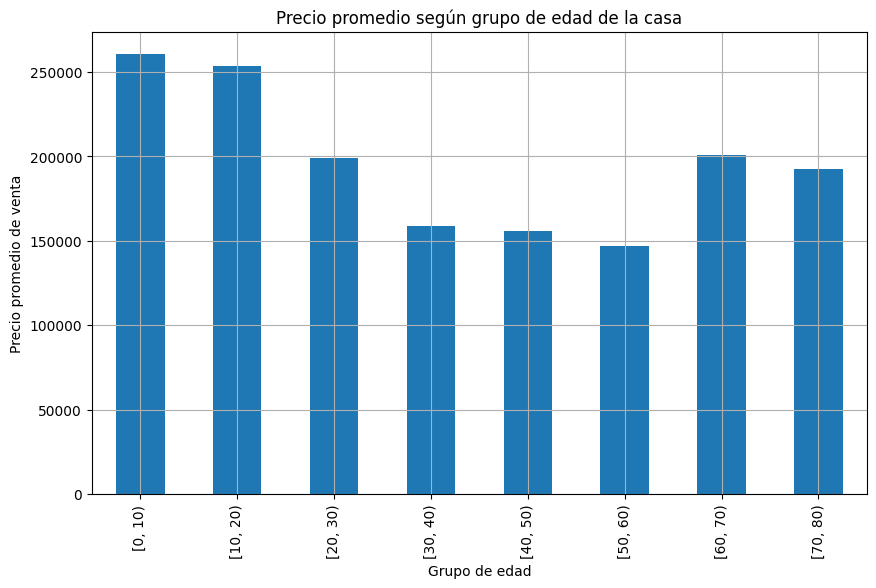

In [50]:
df["AgeGroup"] = pd.cut(df["HouseAge"], bins=[0,10,20,30,40,50,60,70,80], right=False)
grouped = df.groupby("AgeGroup")["SalePrice"].mean()

grouped.plot(kind='bar', figsize=(10,6))
plt.title("Precio promedio según grupo de edad de la casa")
plt.xlabel("Grupo de edad")
plt.ylabel("Precio promedio de venta")
plt.grid(True)
plt.show()


#### Conclusiones

* La mayoría de las casas con precios más altos están entre los 0 y 10 años de antigüedad.
* A medida que la edad aumenta, se reduce la concentración de precios altos.
* La línea de regresión es descendente, lo que confirma estadísticamente que a mayor edad, menor tiende a ser el precio de venta.
* Las casas de 0 a 10 años tienen el precio promedio más alto, seguidas de las de 10 a 20 años.
* A partir de los 30 años, los precios promedio bajan notablemente.
*  las casas de 60 a 80 años tienen un aumento en el precio promedio

### **¿Cuál es el barrio más pobre?**

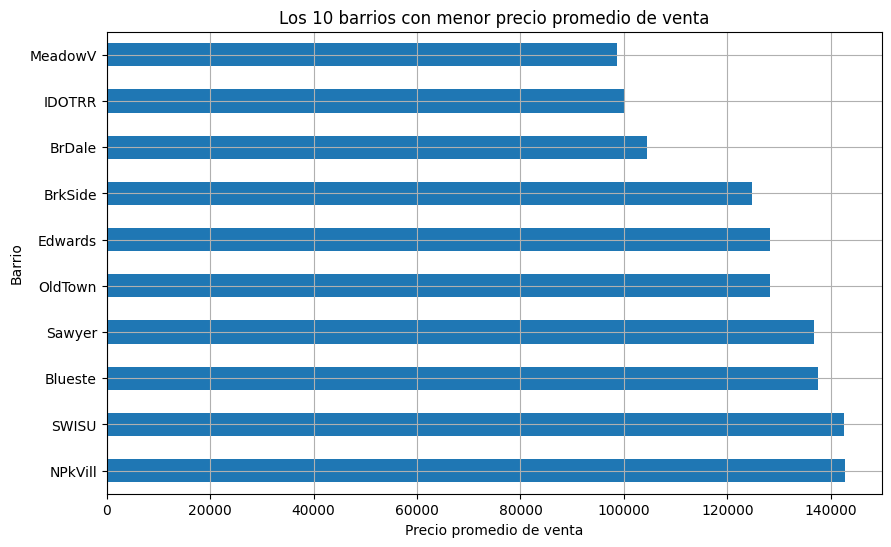

El barrio más pobre es MeadowV con un precio promedio de venta de $98,576


In [67]:
neighborhood_prices = df.groupby("Neighborhood")["SalePrice"].mean().sort_values()
neighborhood_prices.head(10).plot(kind='barh', figsize=(10,6))
plt.title("Los 10 barrios con menor precio promedio de venta")
plt.xlabel("Precio promedio de venta")
plt.ylabel("Barrio")
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()
barrio_mas_pobre = neighborhood_prices.index[0]
precio_promedio = neighborhood_prices.min()

print(f"El barrio más pobre es {barrio_mas_pobre} con un precio promedio de venta de ${precio_promedio:,.0f}")


**¿Cuál es el barrio más cercano a vías férreas?**

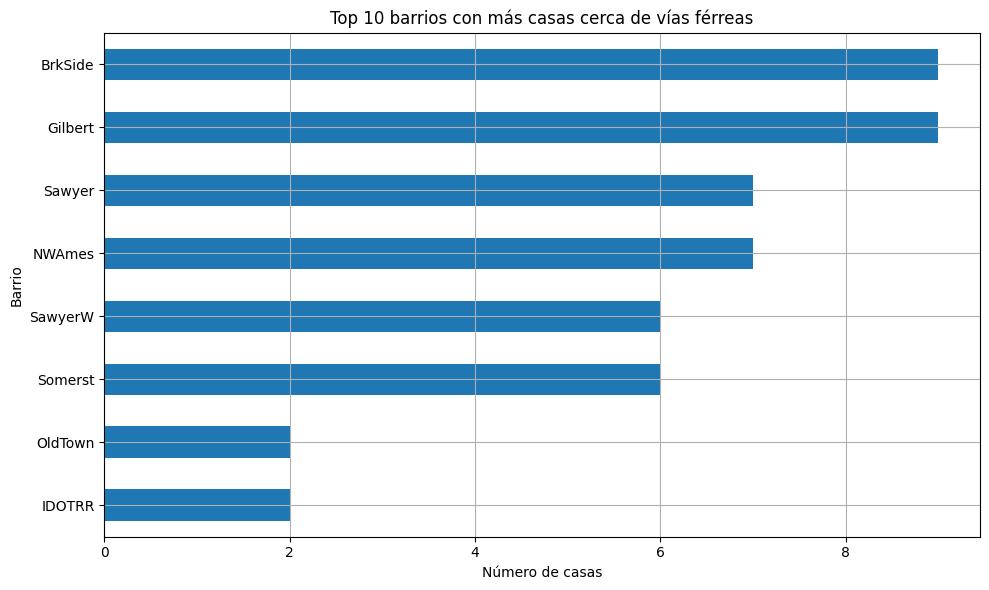

El barrio más cercano a vías férreas es BrkSide y Gilbert con 9 casas cerca de las vías.


In [72]:
vias = df[(df["Condition1"].str.startswith("RR")) | (df["Condition2"].str.startswith("RR"))]

barrio_cerca_vias = vias["Neighborhood"].value_counts()
plt.figure(figsize=(10,6))
barrio_cerca_vias.head(10).plot(kind='barh')
plt.title("Top 10 barrios con más casas cerca de vías férreas")
plt.xlabel("Número de casas")
plt.ylabel("Barrio")
plt.gca().invert_yaxis()  
plt.grid(True)
plt.tight_layout()
plt.show()

barrio_mas_cerca = barrio_cerca_vias.idxmax()
cantidad = barrio_cerca_vias.max()

print(f"El barrio más cercano a vías férreas es {barrio_mas_cerca} y Gilbert con {cantidad} casas cerca de las vías.")


### **¿Cuál es la cobertura más común en las casas que se encuentran el el top 10% en precio?**

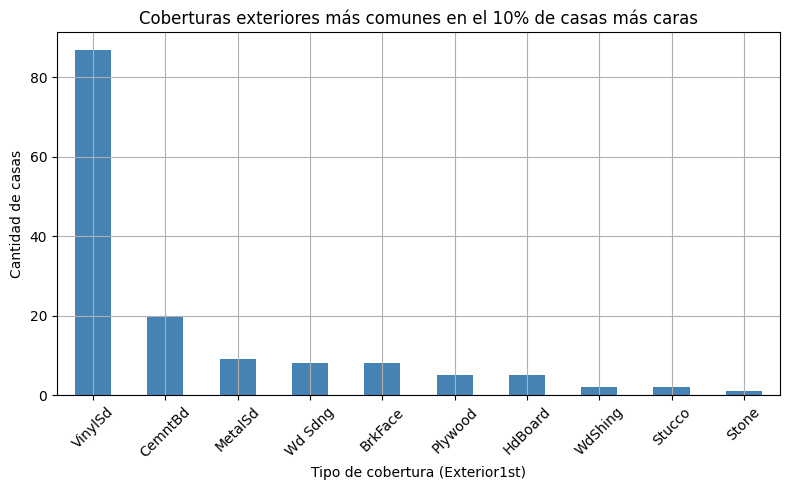

La cobertura exterior más común en las casas del top 10% en precio es 'VinylSd', con 87 casas.


In [92]:
percentil_90 = df["SalePrice"].quantile(0.90)

top_10 = df[df["SalePrice"] >= percentil_90]

top_10["Exterior1st"].value_counts().plot(kind='bar', color='steelblue', figsize=(8,5))
plt.title("Coberturas exteriores más comunes en el 10% de casas más caras")
plt.xlabel("Tipo de cobertura (Exterior1st)")
plt.ylabel("Cantidad de casas")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cobertura_mas_comun = top_10["Exterior1st"].value_counts().idxmax()
cantidad = top_10["Exterior1st"].value_counts().max()

print(f"La cobertura exterior más común en las casas del top 10% en precio es '{cobertura_mas_comun}', con {cantidad} casas.")


### **¿En qué barrio hay mayor desigualdad?**

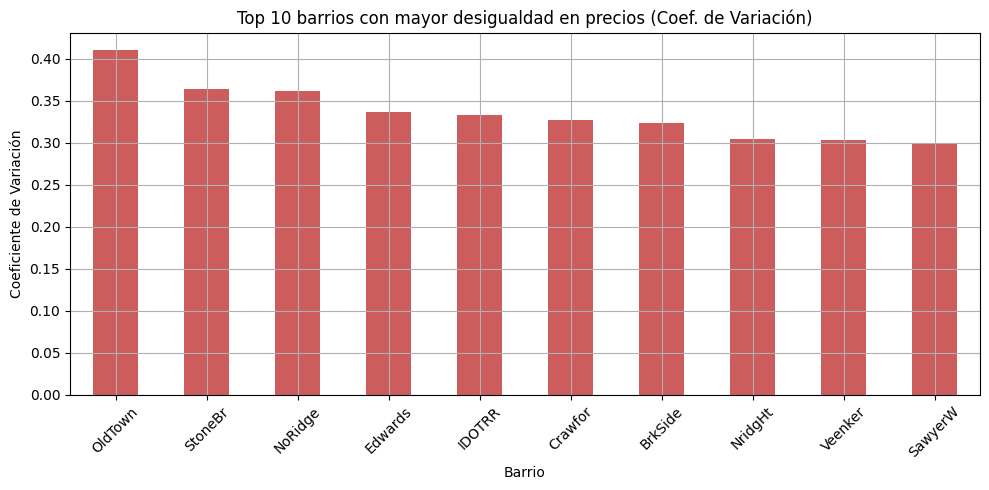

El barrio con mayor desigualdad en precios es 'OldTown', con un coeficiente de variación de 0.41


In [76]:
stats_por_barrio = df.groupby("Neighborhood")["SalePrice"].agg(["mean", "std"])


stats_por_barrio["cv"] = stats_por_barrio["std"] / stats_por_barrio["mean"]


barrio_mayor_desigualdad = stats_por_barrio.sort_values("cv", ascending=False)

barrio_mayor_desigualdad["cv"].head(10).plot(kind="bar", figsize=(10,5), color='indianred')
plt.title("Top 10 barrios con mayor desigualdad en precios (Coef. de Variación)")
plt.ylabel("Coeficiente de Variación")
plt.xlabel("Barrio")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

barrio_top = barrio_mayor_desigualdad.head(1)
nombre_barrio = barrio_top.index[0]
cv = barrio_top["cv"].values[0]

print(f"El barrio con mayor desigualdad en precios es '{nombre_barrio}', con un coeficiente de variación de {cv:.2f}")


### **¿En qué año hubo más movimiento del mercado inmobiliario?**

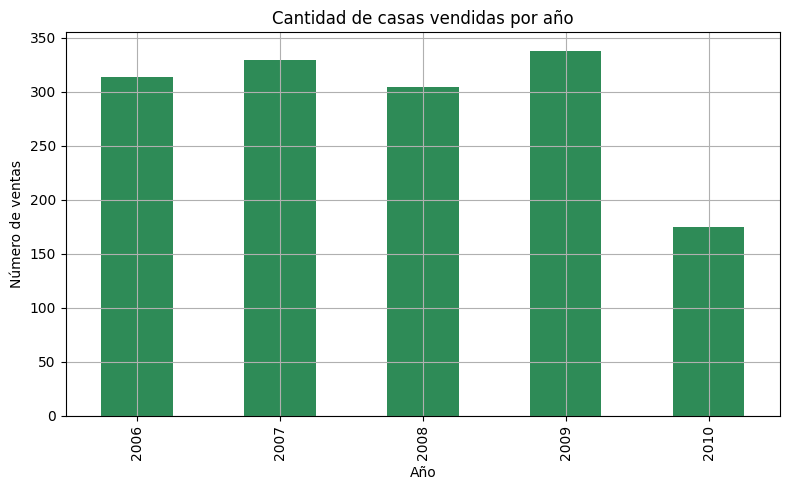

El año con más movimiento en el mercado inmobiliario fue 2009, con 338 ventas.


In [80]:
ventas_por_año = df["YrSold"].value_counts().sort_index()

ventas_por_año.plot(kind='bar', figsize=(8,5), color='seagreen')
plt.title("Cantidad de casas vendidas por año")
plt.xlabel("Año")
plt.ylabel("Número de ventas")
plt.grid(True)
plt.tight_layout()
plt.show()

año_top = ventas_por_año.idxmax()
cantidad = ventas_por_año.max()

print(f"El año con más movimiento en el mercado inmobiliario fue {año_top}, con {cantidad} ventas.")


### **¿Cuáles son los 2 barrios con mayor industria cerca?**

In [86]:
industriales = df[df["MSZoning"] == "I"]


if industriales.empty:
    print("No hay ningun barrio en zona industrial en este dataset.")
else:
    barrios_industria = industriales["Neighborhood"].value_counts()


    plt.figure(figsize=(8,5))
    barrios_industria.plot(kind='bar', color='firebrick')
    plt.title("Cantidad de casas en zona industrial por barrio")
    plt.xlabel("Barrio")
    plt.ylabel("Número de casas en zona industrial")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    top_2 = barrios_industria.head(2)
    for barrio, cantidad in top_2.items():
        print(f"{barrio}: {cantidad} casas en zona industrial")


No hay ningun barrio en zona industrial en este dataset.


### **¿Cuáles son los 2 barrios con mayor comercio cerca?**

In [89]:
df["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

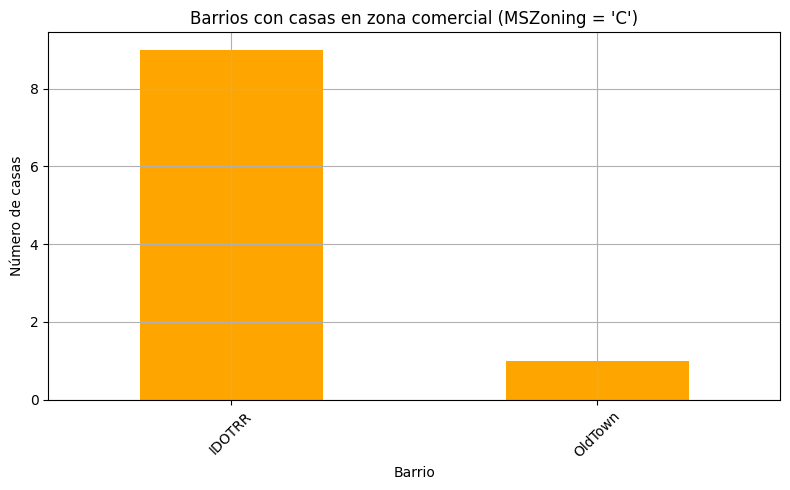

Top 2 barrios con mayor presencia de comercio (MSZoning = 'C'):
- IDOTRR: 9 casas
- OldTown: 1 casas


In [90]:
comerciales = df[df["MSZoning"] == "C (all)"]

barrios_comercio = comerciales["Neighborhood"].value_counts()

if barrios_comercio.empty:
    print("No hay casas en zona comercial en este dataset.")
else:
    barrios_comercio.plot(kind='bar', color='orange', figsize=(8,5))
    plt.title("Barrios con casas en zona comercial (MSZoning = 'C')")
    plt.xlabel("Barrio")
    plt.ylabel("Número de casas")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    top_2 = barrios_comercio.head(2)
    print("Top 2 barrios con mayor presencia de comercio (MSZoning = 'C'):")
    for barrio, cantidad in top_2.items():
        print(f"- {barrio}: {cantidad} casas")
